## 영화 데이터

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162664 sha256=a8c2bda4cd5dff7b51febf64bd8e49191d601c83553ecf10975fb019046db77a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

In [ ]:
# MovieLens 데이터셋 로딩
data = Dataset.load_builtin('ml-100k')

In [ ]:
# Surprise Reader 설정
#reader = Reader(line_format='user item rating timestamp', sep='\t')
#data = Dataset.load_from_file('path/to/u.data', reader=reader)

In [ ]:
# Surprise 데이터셋을 train set과 test set으로 분할
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# SVD 모델 초기화
model = SVD()

In [ ]:
# 모델을 train set에 학습
model.fit(trainset)

In [ ]:
# test set에 대한 예측 수행
predictions = model.test(testset)

In [ ]:
# 예측의 정확도 출력
accuracy.rmse(predictions)

RMSE: 0.9363


0.9362861778258388

In [ ]:
# 특정 사용자에 대한 영화 추천
user_id = str(196)  # 예제로 사용할 사용자 ID
item_id = str(302)  # 예제로 사용할 영화 ID

In [ ]:
predicted_rating = model.predict(user_id, item_id).est
predicted_rating

4.061693384373691

## 게임 데이터

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
col_name=['userid','itemid','type','time']
df = pd.read_csv('/content/new_steam.csv', header=None, names=col_name)
df

,userid,itemid,type,time
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [ ]:
new_df=df[df['type']=='play']
new_df

,userid,itemid,type,time
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9
...,...,...,...,...
199991,128470551,Fallen Earth,play,2.4
199993,128470551,Magic Duels,play,2.2
199995,128470551,Titan Souls,play,1.5
199997,128470551,Grand Theft Auto Vice City,play,1.5


In [ ]:
new_df.reset_index(drop=True, inplace=True)
new_df

,userid,itemid,type,time
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,play,87.0
2,151603712,Spore,play,14.9
3,151603712,Fallout New Vegas,play,12.1
4,151603712,Left 4 Dead 2,play,8.9
...,...,...,...,...
70484,128470551,Fallen Earth,play,2.4
70485,128470551,Magic Duels,play,2.2
70486,128470551,Titan Souls,play,1.5
70487,128470551,Grand Theft Auto Vice City,play,1.5


In [ ]:
new_df=new_df[['userid','itemid','time']]
new_df

,userid,itemid,time
0,151603712,The Elder Scrolls V Skyrim,273.0
1,151603712,Fallout 4,87.0
2,151603712,Spore,14.9
3,151603712,Fallout New Vegas,12.1
4,151603712,Left 4 Dead 2,8.9
...,...,...,...
70484,128470551,Fallen Earth,2.4
70485,128470551,Magic Duels,2.2
70486,128470551,Titan Souls,1.5
70487,128470551,Grand Theft Auto Vice City,1.5


In [ ]:
new_df.describe()

,userid,time
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

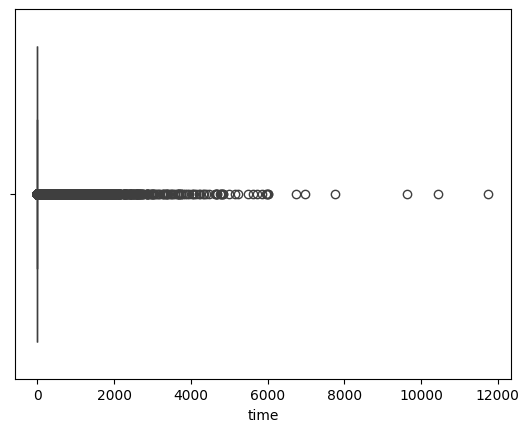

In [ ]:
sns.boxplot(x=df['time'])
plt.show()

In [ ]:
new_df.describe()

,userid,time
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


In [ ]:
# 1시간 이하, 4시간 이하, 19시간 이하, 1000시간 이상, 그 이상
bins=[0,1,4,19,100,100000]
labels=[1,2,3,4,5]
new_df['rating']=pd.cut(new_df['time'],bins=bins,labels=labels,include_lowest=True)
new_df

,userid,itemid,time,rating
0,151603712,The Elder Scrolls V Skyrim,273.0,5
1,151603712,Fallout 4,87.0,4
2,151603712,Spore,14.9,3
3,151603712,Fallout New Vegas,12.1,3
4,151603712,Left 4 Dead 2,8.9,3
...,...,...,...,...
70484,128470551,Fallen Earth,2.4,2
70485,128470551,Magic Duels,2.2,2
70486,128470551,Titan Souls,1.5,2
70487,128470551,Grand Theft Auto Vice City,1.5,2


In [ ]:
new_df

,userid,itemid,time,rating
0,151603712,The Elder Scrolls V Skyrim,273.0,5
1,151603712,Fallout 4,87.0,4
2,151603712,Spore,14.9,3
3,151603712,Fallout New Vegas,12.1,3
4,151603712,Left 4 Dead 2,8.9,3
...,...,...,...,...
70484,128470551,Fallen Earth,2.4,2
70485,128470551,Magic Duels,2.2,2
70486,128470551,Titan Souls,1.5,2
70487,128470551,Grand Theft Auto Vice City,1.5,2


In [ ]:
new_df['rating'].value_counts()

3    18867
1    17850
2    16102
4    11938
5     5732
Name: rating, dtype: int64

In [ ]:
# Surprise Reader 설정
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df[['userid', 'itemid', 'rating']], reader)

In [ ]:
data

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# SVD 모델 초기화
model = SVD()

In [ ]:
# 모델을 train set에 학습
model.fit(trainset)

In [ ]:
# test set에 대한 예측 수행
predictions = model.test(testset)

In [ ]:
# 예측의 정확도 출력
accuracy.rmse(predictions)

RMSE: 1.1013


1.1013094066913607

In [ ]:
# 하이퍼파라미터 그리드 설정
param_grid = {'n_factors': [5, 10, 20],
              'n_epochs': [10, 20, 30],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.05, 0.1]}

In [ ]:
# 하이퍼파라미터 그리드 설정
param_grid = {'n_factors': [5, 10, 20,50,100,200,300,400],
              'reg_all': [0.02, 0.05, 0.1,0.25,0.5,0.75,1]}

In [ ]:
from surprise.model_selection import GridSearchCV

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search.fit(data)

In [ ]:
# 최적의 하이퍼파라미터 출력
print(f"Best RMSE: {grid_search.best_score['rmse']}")
print(f"Best MAE: {grid_search.best_score['mae']}")
print(f"Best Parameters: {grid_search.best_params['rmse']}")

Best RMSE: 1.08888599886373
Best MAE: 0.8946695881600427
Best Parameters: {'n_factors': 5, 'reg_all': 0.05}


In [ ]:
# 최적의 하이퍼파라미터 출력
print(f"Best RMSE: {grid_search.best_score['rmse']}")
print(f"Best MAE: {grid_search.best_score['mae']}")
print(f"Best Parameters: {grid_search.best_params['rmse']}")

Best RMSE: 1.0877756049587246
Best MAE: 0.8909369929399018
Best Parameters: {'n_factors': 5, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}


In [ ]:
trainset, testset = train_test_split(data, test_size=0.1, random_state=42)

In [ ]:
# SVD 모델 초기화
model = SVD()

In [ ]:
# 모델을 train set에 학습
model.fit(trainset)

In [ ]:
# test set에 대한 예측 수행
predictions = model.test(testset)

In [ ]:
# 예측의 정확도 출력
accuracy.rmse(predictions)

RMSE: 1.1027


1.1027466846254539

In [ ]:
model=SVD(n_factors=5, n_epochs=30, lr_all=0.005, reg_all=0.1)

## 데이터 증강하기(50% 증강)

In [3]:
import pandas as pd
import numpy as np

In [21]:
col_name=['userid','itemid','type','time']
df = pd.read_csv('/content/drive/MyDrive/steam-200k.csv',header=None)
df

,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [22]:
df.columns=['userid','itemid','type','time','etc']

In [26]:
df=df[df['type']=='play']

In [27]:
df.reset_index(drop=True, inplace=True)
df

,userid,itemid,type,time,etc
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,play,87.0,0
2,151603712,Spore,play,14.9,0
3,151603712,Fallout New Vegas,play,12.1,0
4,151603712,Left 4 Dead 2,play,8.9,0
...,...,...,...,...,...
70484,128470551,Fallen Earth,play,2.4,0
70485,128470551,Magic Duels,play,2.2,0
70486,128470551,Titan Souls,play,1.5,0
70487,128470551,Grand Theft Auto Vice City,play,1.5,0


In [28]:
new_df=df[['userid','itemid','time']]
new_df

,userid,itemid,time
0,151603712,The Elder Scrolls V Skyrim,273.0
1,151603712,Fallout 4,87.0
2,151603712,Spore,14.9
3,151603712,Fallout New Vegas,12.1
4,151603712,Left 4 Dead 2,8.9
...,...,...,...
70484,128470551,Fallen Earth,2.4
70485,128470551,Magic Duels,2.2
70486,128470551,Titan Souls,1.5
70487,128470551,Grand Theft Auto Vice City,1.5


In [29]:
# 1시간 이하, 4시간 이하, 19시간 이하, 1000시간 이상, 그 이상
bins=[0,1,4,19,100,100000]
labels=[1,2,3,4,5]
new_df['rating']=pd.cut(new_df['time'],bins=bins,labels=labels,include_lowest=True)
new_df

<ipython-input-29-b9ceb955f496>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['rating']=pd.cut(new_df['time'],bins=bins,labels=labels,include_lowest=True)


,userid,itemid,time,rating
0,151603712,The Elder Scrolls V Skyrim,273.0,5
1,151603712,Fallout 4,87.0,4
2,151603712,Spore,14.9,3
3,151603712,Fallout New Vegas,12.1,3
4,151603712,Left 4 Dead 2,8.9,3
...,...,...,...,...
70484,128470551,Fallen Earth,2.4,2
70485,128470551,Magic Duels,2.2,2
70486,128470551,Titan Souls,1.5,2
70487,128470551,Grand Theft Auto Vice City,1.5,2


In [31]:
sampled_data=new_df.sample(frac=0.5)
sampled_data

,userid,itemid,time,rating
47024,118723066,Dizzel,0.5,1
66449,74764496,RaceRoom Racing Experience,3.8,2
42982,62990992,Dota 2,8.7,3
59724,60608576,FTL Faster Than Light,12.8,3
995,57103808,Men of War Assault Squad 2,5.0,3
...,...,...,...,...
29148,8585433,The Wolf Among Us,8.4,3
64863,154296520,Moonbase Alpha,0.6,1
63164,75598925,Counter-Strike Global Offensive,4.6,3
31423,113544961,Guns of Icarus Online,31.0,4


In [32]:
final_data=pd.concat([new_df,sampled_data],axis=0)
final_data

,userid,itemid,time,rating
0,151603712,The Elder Scrolls V Skyrim,273.0,5
1,151603712,Fallout 4,87.0,4
2,151603712,Spore,14.9,3
3,151603712,Fallout New Vegas,12.1,3
4,151603712,Left 4 Dead 2,8.9,3
...,...,...,...,...
29148,8585433,The Wolf Among Us,8.4,3
64863,154296520,Moonbase Alpha,0.6,1
63164,75598925,Counter-Strike Global Offensive,4.6,3
31423,113544961,Guns of Icarus Online,31.0,4


In [33]:
final_data.reset_index(drop=True, inplace=True)


In [35]:
final_data=final_data[['userid','itemid','rating']]

In [36]:
final_data

,userid,itemid,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,151603712,Fallout 4,4
2,151603712,Spore,3
3,151603712,Fallout New Vegas,3
4,151603712,Left 4 Dead 2,3
...,...,...,...
105728,8585433,The Wolf Among Us,3
105729,154296520,Moonbase Alpha,1
105730,75598925,Counter-Strike Global Offensive,3
105731,113544961,Guns of Icarus Online,4


In [37]:
# Surprise Reader 설정
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(final_data[['userid', 'itemid', 'rating']], reader)

In [38]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [39]:
# SVD 모델 초기화
model = SVD()

In [40]:
# 모델을 train set에 학습
model.fit(trainset)

In [41]:
# test set에 대한 예측 수행
predictions = model.test(testset)

In [42]:
# 예측의 정확도 출력
accuracy.rmse(predictions)

RMSE: 0.8956


0.895603145072933

In [43]:
# 하이퍼파라미터 그리드 설정
param_grid = {'n_factors': [5, 10, 20],
              'n_epochs': [10, 20, 30],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.05, 0.1]}

In [44]:
from surprise.model_selection import GridSearchCV

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search.fit(data)

In [45]:
# 최적의 하이퍼파라미터 출력
print(f"Best RMSE: {grid_search.best_score['rmse']}")
print(f"Best MAE: {grid_search.best_score['mae']}")
print(f"Best Parameters: {grid_search.best_params['rmse']}")

Best RMSE: 0.9310857846353816
Best MAE: 0.6970920450091932
Best Parameters: {'n_factors': 20, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.02}


In [47]:
final_data.to_csv("final_data.csv")